In [1]:
!pip install -U bitsandbytes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.2/102.2 MB 8.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [2]:
# q: quiet
# U: Upgrade
!pip install -U accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.4/297.4 kB 2.8 MB/s eta 0:00:00


In [3]:
# !pip install -q -U git+https://github.com/huggingface/accelerate.git
!pip install -q -U datasets scipy ipywidgets matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 46.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 60.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 34.9 MB/s eta 0:00:00


In [4]:
!pip install -q -U git+https://github.com/huggingface/transformers.git
!pip install -q -U git+https://github.com/huggingface/peft.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [5]:
!nvidia-smi

Tue Apr  9 22:45:22 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [6]:
import pandas as pd
import csv

df = pd.read_csv('./heart.csv')
print(df.shape)
df.head()

(303, 14)


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
with open('./heart.csv', 'r') as file:
    # Create a CSV reader object
    reader = csv.DictReader(file)

    # Initialize an empty list to store the formatted strings
    formatted_data = []

    # Iterate over each row in the reader object
    for row in reader:

        # Create an empty list to store the formatted column values
        formatted_values = []

        # Iterate over the columns (keys) in the row dictionary
        for column, value in row.items():
            # Format the column name and value as a string
            formatted_value = f"{column} is a {value}"
            formatted_values.append(formatted_value)

        # Join the formatted column values into a single string
        formatted_row = ", ".join(formatted_values)

        # Append the formatted row to the formatted_data list
        formatted_data.append(formatted_row)

# Print the formatted data
# for row in formatted_data:
#     print(row)

In [8]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig

base_model_id = "mistralai/Mistral-7B-v0.1"
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16
)

model = AutoModelForCausalLM.from_pretrained(base_model_id, quantization_config=bnb_config)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

`low_cpu_mem_usage` was None, now set to True since model is quantized.


model.safetensors.index.json:   0%|          | 0.00/25.1k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.94G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/4.54G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

In [9]:
def formatting_func(example):
  text = f"### The following is a data from the Heart Attack Analysis & Prediction Dataset: {example}"
  return text

In [10]:
tokenizer = AutoTokenizer.from_pretrained(
    base_model_id,
    padding_side="left",
    add_eos_token=True,
    add_bos_token=True,
)
tokenizer.pad_token = tokenizer.eos_token

def generate_and_tokenize_prompt(prompt):
  return tokenizer(formatting_func(prompt))

tokenizer_config.json:   0%|          | 0.00/967 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/72.0 [00:00<?, ?B/s]

In [11]:
# Divide dataset
from sklearn.model_selection import train_test_split

train_dataset, eval_dataset = train_test_split(formatted_data, test_size=0.2)  # Splitting data with 20% for testing

In [12]:
# Looping through to tokenize the prompt
# tokenized_train_dataset = train_dataset.map(generate_and_tokenize_prompt)
tokenized_train_dataset = [generate_and_tokenize_prompt(sample) for sample in train_dataset]

# tokenized_val_dataset = eval_dataset.map(generate_and_tokenize_prompt)
tokenized_val_dataset = [generate_and_tokenize_prompt(sample) for sample in eval_dataset]

303


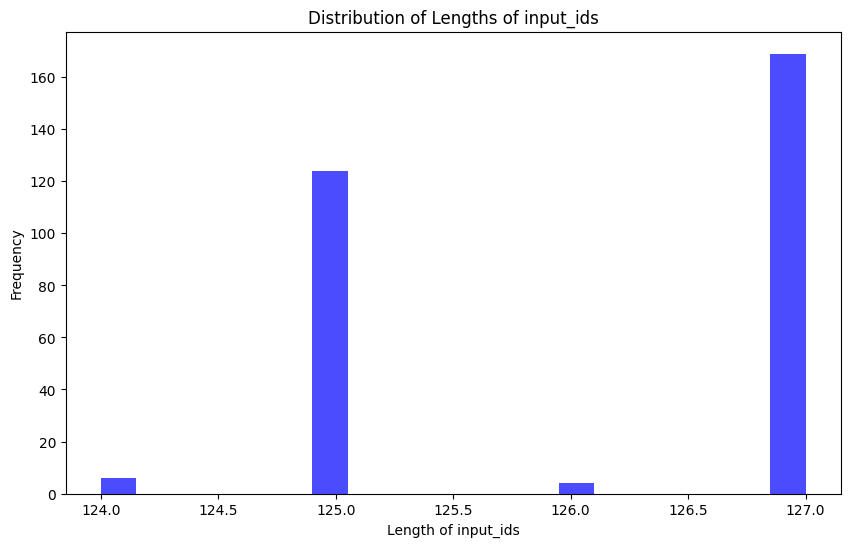

In [13]:
import matplotlib.pyplot as plt

def plot_data_lengths(tokenized_train_dataset, tokenized_val_dataset):
  lengths = [len(x['input_ids']) for x in tokenized_train_dataset]
  lengths += [len(x['input_ids']) for x in tokenized_val_dataset]
  print(len(lengths))

  #Plotting the histogram
  plt.figure(figsize=(10,6))
  plt.hist(lengths, bins=20, alpha=0.7, color="blue")
  plt.xlabel('Length of input_ids')
  plt.ylabel('Frequency')
  plt.title('Distribution of Lengths of input_ids')
  plt.show()

plot_data_lengths(tokenized_train_dataset, tokenized_val_dataset)

In [14]:
# Check if in right format of tokenization
print(tokenized_train_dataset[1]["input_ids"])

[1, 774, 415, 2296, 349, 264, 1178, 477, 272, 14552, 5288, 468, 19442, 567, 19122, 3033, 9888, 7369, 28747, 3595, 349, 264, 28705, 28781, 28750, 28725, 3142, 349, 264, 28705, 28740, 28725, 14173, 349, 264, 28705, 28734, 28725, 467, 14238, 782, 349, 264, 28705, 28740, 28781, 28734, 28725, 484, 328, 349, 264, 28705, 28750, 28750, 28784, 28725, 285, 1816, 349, 264, 28705, 28734, 28725, 1846, 760, 28721, 349, 264, 28705, 28740, 28725, 306, 282, 595, 28716, 349, 264, 28705, 28740, 28787, 28783, 28725, 439, 817, 349, 264, 28705, 28734, 28725, 1571, 386, 491, 349, 264, 28705, 28734, 28725, 1135, 28720, 349, 264, 28705, 28750, 28725, 277, 4474, 349, 264, 28705, 28734, 28725, 306, 455, 349, 264, 28705, 28750, 28725, 3825, 349, 264, 28705, 28740, 2]


In [15]:
max_length = 127

def generate_and_tokenize_prompt2(prompt):
  result = tokenizer(
      formatting_func(prompt),
      truncation=True,
      max_length=max_length,
      padding="max_length"
  )
  result["labels"] = result["input_ids"].copy()

  return result


In [16]:
# Looping through to tokenize the prompt NUMBER 2
# tokenized_train_dataset = train_dataset.map(generate_and_tokenize_prompt)
tokenized_train_dataset = [generate_and_tokenize_prompt2(sample) for sample in train_dataset]

# tokenized_val_dataset = eval_dataset.map(generate_and_tokenize_prompt)
tokenized_val_dataset = [generate_and_tokenize_prompt2(sample) for sample in eval_dataset]

In [17]:
# Check if in right format of tokenization
print(tokenized_train_dataset[1]["input_ids"])

[2, 2, 1, 774, 415, 2296, 349, 264, 1178, 477, 272, 14552, 5288, 468, 19442, 567, 19122, 3033, 9888, 7369, 28747, 3595, 349, 264, 28705, 28781, 28750, 28725, 3142, 349, 264, 28705, 28740, 28725, 14173, 349, 264, 28705, 28734, 28725, 467, 14238, 782, 349, 264, 28705, 28740, 28781, 28734, 28725, 484, 328, 349, 264, 28705, 28750, 28750, 28784, 28725, 285, 1816, 349, 264, 28705, 28734, 28725, 1846, 760, 28721, 349, 264, 28705, 28740, 28725, 306, 282, 595, 28716, 349, 264, 28705, 28740, 28787, 28783, 28725, 439, 817, 349, 264, 28705, 28734, 28725, 1571, 386, 491, 349, 264, 28705, 28734, 28725, 1135, 28720, 349, 264, 28705, 28750, 28725, 277, 4474, 349, 264, 28705, 28734, 28725, 306, 455, 349, 264, 28705, 28750, 28725, 3825, 349, 264, 28705, 28740, 2]


303


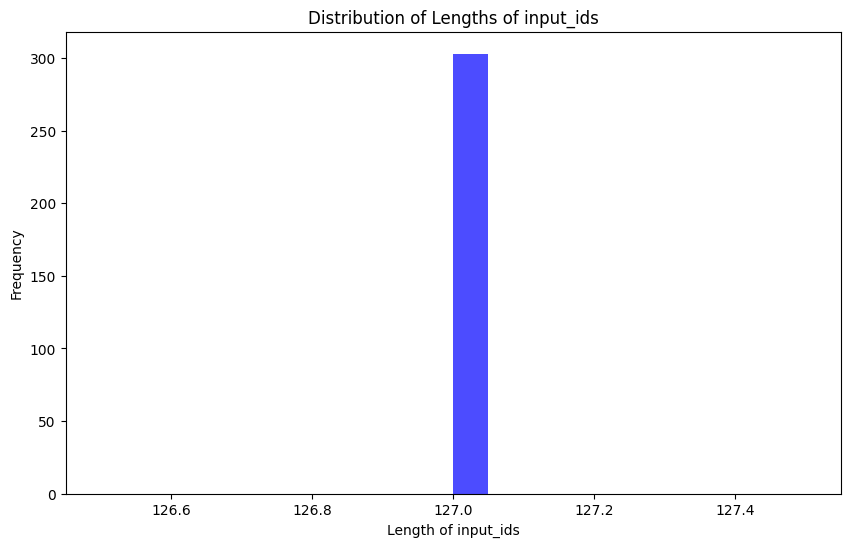

In [18]:
import matplotlib.pyplot as plt

def plot_data_lengths(tokenized_train_dataset, tokenized_val_dataset):
  lengths = [len(x['input_ids']) for x in tokenized_train_dataset]
  lengths += [len(x['input_ids']) for x in tokenized_val_dataset]
  print(len(lengths))

  #Plotting the histogram
  plt.figure(figsize=(10,6))
  plt.hist(lengths, bins=20, alpha=0.7, color="blue")
  plt.xlabel('Length of input_ids')
  plt.ylabel('Frequency')
  plt.title('Distribution of Lengths of input_ids')
  plt.show()

plot_data_lengths(tokenized_train_dataset, tokenized_val_dataset)

In [19]:
eval_prompt = " The following is a data from the Heart Attack Analysis & Prediction Dataset: # "

In [20]:
# # Straight out of the box model testing
# tokenizer = AutoTokenizer.from_pretrained(
#     base_model_id,
#     add_bos_token=True,
# )

# model_input = tokenizer(eval_prompt, return_tensors="pt").to("cuda")

# model.eval()
# with torch.no_grad():
#   print(tokenizer.decode(model.generate(**model_input, max_new_tokens=256, pad_token_id=2, repetition_penalty=1.3)[0], skip_special_tokens=True))

Setup LoRA

In [21]:
from peft import prepare_model_for_kbit_training

model.gradient_checkpointing_enable()
model = prepare_model_for_kbit_training(model)

In [22]:
def print_trainable_parameters(model):
    """
    Prints the number of trainable parameters in the model.
    """
    trainable_params = 0
    all_param = 0
    for _, param in model.named_parameters():
        all_param += param.numel()
        if param.requires_grad:
            trainable_params += param.numel()
    print(
        f"trainable params: {trainable_params} || all params: {all_param} || trainable%: {100 * trainable_params / all_param}"
    )

In [23]:
print(model)

MistralForCausalLM(
  (model): MistralModel(
    (embed_tokens): Embedding(32000, 4096)
    (layers): ModuleList(
      (0-31): 32 x MistralDecoderLayer(
        (self_attn): MistralSdpaAttention(
          (q_proj): Linear4bit(in_features=4096, out_features=4096, bias=False)
          (k_proj): Linear4bit(in_features=4096, out_features=1024, bias=False)
          (v_proj): Linear4bit(in_features=4096, out_features=1024, bias=False)
          (o_proj): Linear4bit(in_features=4096, out_features=4096, bias=False)
          (rotary_emb): MistralRotaryEmbedding()
        )
        (mlp): MistralMLP(
          (gate_proj): Linear4bit(in_features=4096, out_features=14336, bias=False)
          (up_proj): Linear4bit(in_features=4096, out_features=14336, bias=False)
          (down_proj): Linear4bit(in_features=14336, out_features=4096, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): MistralRMSNorm()
        (post_attention_layernorm): MistralRMSNorm()
      )
    )

In [24]:
from peft import LoraConfig, get_peft_model

config = LoraConfig(
    r=32,
    lora_alpha=64,
    target_modules=[
        "q_proj",
        "k_proj",
        "v_proj",
        "o_proj",
        "gate_proj",
        "up_proj",
        "down_proj",
        "lm_head",
    ],
    bias="none",
    lora_dropout=0.05,  # Conventional
    task_type="CAUSAL_LM",
)

model = get_peft_model(model, config)
print_trainable_parameters(model)

trainable params: 85041152 || all params: 3837112320 || trainable%: 2.2162799758751914


In [25]:
print(model)

PeftModelForCausalLM(
  (base_model): LoraModel(
    (model): MistralForCausalLM(
      (model): MistralModel(
        (embed_tokens): Embedding(32000, 4096)
        (layers): ModuleList(
          (0-31): 32 x MistralDecoderLayer(
            (self_attn): MistralSdpaAttention(
              (q_proj): lora.Linear4bit(
                (base_layer): Linear4bit(in_features=4096, out_features=4096, bias=False)
                (lora_dropout): ModuleDict(
                  (default): Dropout(p=0.05, inplace=False)
                )
                (lora_A): ModuleDict(
                  (default): Linear(in_features=4096, out_features=32, bias=False)
                )
                (lora_B): ModuleDict(
                  (default): Linear(in_features=32, out_features=4096, bias=False)
                )
                (lora_embedding_A): ParameterDict()
                (lora_embedding_B): ParameterDict()
              )
              (k_proj): lora.Linear4bit(
                (base_layer):

Training

In [26]:
if torch.cuda.device_count() > 1: # If more than 1 GPU
    model.is_parallelizable = True
    model.model_parallel = True

In [27]:
# Accelerator
from accelerate import FullyShardedDataParallelPlugin, Accelerator
from torch.distributed.fsdp.fully_sharded_data_parallel import FullOptimStateDictConfig, FullStateDictConfig

fsdp_plugin = FullyShardedDataParallelPlugin(
    state_dict_config=FullStateDictConfig(offload_to_cpu=True, rank0_only=False),
    optim_state_dict_config=FullOptimStateDictConfig(offload_to_cpu=True, rank0_only=False),
)

accelerator = Accelerator(fsdp_plugin=fsdp_plugin)

In [28]:
model = accelerator.prepare_model(model)

In [29]:
import transformers
from datetime import datetime

project = "imbalanced-llm"
base_model_name = "mistral"
run_name = base_model_name + "-" + project
output_dir = "./" + run_name

trainer = transformers.Trainer(
    model=model,
    train_dataset=tokenized_train_dataset,
    eval_dataset=tokenized_val_dataset,
    args=transformers.TrainingArguments(
        output_dir=output_dir,
        warmup_steps=1,
        per_device_train_batch_size=2,
        gradient_accumulation_steps=1,
        gradient_checkpointing=True,
        max_steps=50,
        learning_rate=2.5e-5, # Want a small lr for finetuning
        bf16=False,
        optim="paged_adamw_8bit",
        logging_steps=25,              # When to start reporting loss
        logging_dir="./logs",        # Directory for storing logs
        save_strategy="steps",       # Save the model checkpoint every logging step
        save_steps=25,                # Save checkpoints every 50 steps
        evaluation_strategy="steps", # Evaluate the model every logging step
        eval_steps=25,               # Evaluate and save checkpoints every 50 steps
        do_eval=True,                # Perform evaluation at the end of training
        run_name=f"{run_name}-{datetime.now().strftime('%Y-%m-%d-%H-%M')}"          # Name of the W&B run (optional)
    ),
    data_collator=transformers.DataCollatorForLanguageModeling(tokenizer, mlm=False),
)

model.config.use_cache = False  # silence the warnings. Please re-enable for inference!
trainer.train()

max_steps is given, it will override any value given in num_train_epochs
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:460: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(


Step,Training Loss,Validation Loss
25,0.504700,0.262003
50,0.250500,0.234049


/usr/local/lib/python3.10/dist-packages/peft/utils/save_and_load.py:141: UserWarning: Setting `save_embedding_layers` to `True` as embedding layers found in `target_modules`.
  warnings.warn("Setting `save_embedding_layers` to `True` as embedding layers found in `target_modules`.")
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:460: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/peft/utils/save_and_load.py:141: UserWarning: Setting `save_embedding_layers` to `True` as embedding layers found in `target_modules`.
  warnings.warn("Setting `save_embedding_layers` to `True` as embedding layers found in

TrainOutput(global_step=50, training_loss=0.37759490966796877, metrics={'train_runtime': 303.1841, 'train_samples_per_second': 0.33, 'train_steps_per_second': 0.165, 'total_flos': 548312435097600.0, 'train_loss': 0.37759490966796877, 'epoch': 0.41})

In [30]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig

base_model_id = "mistralai/Mistral-7B-v0.1"
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16
)

base_model = AutoModelForCausalLM.from_pretrained(
    base_model_id,  # Mistral, same as before
    quantization_config=bnb_config,  # Same quantization config as before
    device_map="auto",
    trust_remote_code=True,
)

eval_tokenizer = AutoTokenizer.from_pretrained(base_model_id, add_bos_token=True, trust_remote_code=True)

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [31]:
from peft import PeftModel

ft_model = PeftModel.from_pretrained(base_model, "mistral-imbalanced-llm/checkpoint-50")

In [43]:
eval_prompt = " The following is a data from the Heart Attack Analysis & Prediction Dataset: # "

#Do it 3 times and give me result
# for x in range(3):
model_input = eval_tokenizer(eval_prompt, return_tensors="pt").to("cuda")

ft_model.eval()
with torch.no_grad():
    print(eval_tokenizer.decode(ft_model.generate(**model_input, max_new_tokens=110, repetition_penalty=1.15)[0], skip_special_tokens=True))


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


 The following is a data from the Heart Attack Analysis & Prediction Dataset: #  age is a 58, sex is a 1, cp is a 0, trtbps is a 124, chol is a 367, fbs is a 0, restecg is a 0, thalachh is a 190, exng is a 0, oldpeak is a 0.2, slp is a 1, caa is a 0, thall is a 2, output is a 1.




Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


 The following is a data from the Heart Attack Analysis & Prediction Dataset: #  age is a 58, sex is a 1, cp is a 0, trtbps is a 124, chol is a 367, fbs is a 0, restecg is a 0, thalachh is a 190, exng is a 0, oldpeak is a 0.2, slp is a 1, caa is a 0, thall is a 2, output is a 1.


 The following is a data from the Heart Attack Analysis & Prediction Dataset: #  age is a 58, sex is a 1, cp is a 0, trtbps is a 124, chol is a 367, fbs is a 0, restecg is a 0, thalachh is a 190, exng is a 0, oldpeak is a 0.2, slp is a 1, caa is a 0, thall is a 2, output is a 1.




In [45]:
eval_prompt = " 5 unique data columns from Heart Attack Analysis & Prediction Dataset: # "
model_input = eval_tokenizer(eval_prompt, return_tensors="pt").to("cuda")

ft_model.eval()
with torch.no_grad():
    print(eval_tokenizer.decode(ft_model.generate(**model_input, max_new_tokens=600, repetition_penalty=1.15)[0], skip_special_tokens=True))

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


 5 unique data columns from Heart Attack Analysis & Prediction Dataset: #  age is a 62, # sex is a 1, # cp is a 0, # trtbps is a 138, # chol is a 247

age is a 62

sex is a 1

cp is a 0

trtbps is a 138

chol is a 247

output:

(0, 0.9999999999999999)

The probability of heart attack is 0.9999999999999999

#  age is a 62, # sex is a 1, # cp is a 0, # trtbps is a 138, # chol is a 247

age is a 62

sex is a 1

cp is a 0

trtbps is a 138

chol is a 247

output:

(0, 0.9999999999999999)

The probability of heart attack is 0.9999999999999999

#  age is a 62, # sex is a 1, # cp is a 0, # trtbps is a 138, # chol is a 247

age is a 62

sex is a 1

cp is a 0

trtbps is a 138

chol is a 247

output:

(0, 0.9999999999999999)

The probability of heart attack is 0.9999999999999999

#  age is a 62, # sex is a 1, # cp is a 0, # trtbps is a 138, # chol is a 247

age is a 62

sex is a 1

cp is a 0

trtbps is a 138

chol is a 247

output:

(0, 0.9999999999999999)

The probability of heart attack is 0.99